In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### FETCHING DATA

In [40]:
xtrain = pd.read_csv("X_train.csv")
xtest = pd.read_csv("X_test.csv")
ytrain = pd.read_csv("Y_train.csv")

In [41]:
df = pd.concat([xtrain,ytrain["value"]],axis=1)
df.head()

,id,brand,year,age,engine_size,power,mileage,prev_owners,value
0,id_11042,bmw,2016,2,3500,272.0,4751.0,0,24350.0
1,id_7042,ford,2009,9,1400,96.0,59288.0,2,100.0
2,id_1420,vw,2014,4,3600,252.0,13387.0,0,15500.0
3,id_64357,ford,2012,6,2200,150.0,3194.0,0,5950.0
4,id_79541,kia,2011,7,1200,80.0,2645.0,0,4600.0


#### HANDLING MISSING VALUES

In [42]:
df.isnull().sum()

id             0
brand          0
year           0
age            0
engine_size    0
power          0
mileage        0
prev_owners    0
value          0
dtype: int64

In [43]:
xtest.isnull().sum()

id             0
brand          0
year           0
age            0
engine_size    0
power          0
mileage        0
prev_owners    0
dtype: int64

NO MISSING VALUES

#### DATA PREPROCESSING AND FEATURE ENGINEERING

In [44]:
df.shape

(70000, 9)

In [45]:
xtest.shape

(30000, 8)

In [46]:
len(df["id"].unique())

70000

In [47]:
#70000 unique values . Clearly no correlation with value. Drop the column
df= df[[x for x in df.columns if x!="id"]]
df.head()

,brand,year,age,engine_size,power,mileage,prev_owners,value
0,bmw,2016,2,3500,272.0,4751.0,0,24350.0
1,ford,2009,9,1400,96.0,59288.0,2,100.0
2,vw,2014,4,3600,252.0,13387.0,0,15500.0
3,ford,2012,6,2200,150.0,3194.0,0,5950.0
4,kia,2011,7,1200,80.0,2645.0,0,4600.0


In [48]:
len(df["brand"].unique())

5

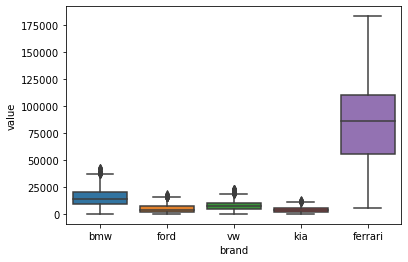

In [49]:
sns.boxplot(x="brand",y="value",data = df)

In [50]:
#the brand is an important feature in prediction of price

In [51]:
#next we have year

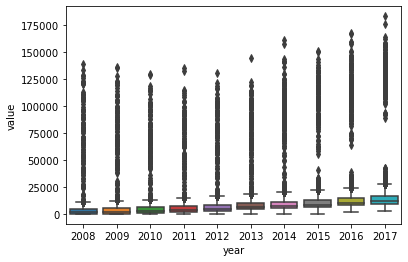

In [52]:
sns.boxplot(x="year",y="value",data=df)

In [53]:
#newer cars can be seen to have a higher price
#if we see, age and year features give the same info, therefore they will have a high correlation value
# let's check

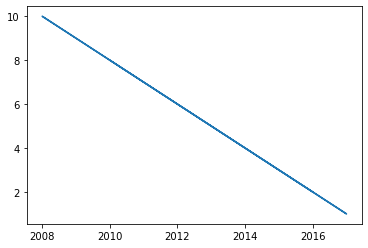

In [54]:
plt.plot(df["year"],df["age"])

In [56]:
# so we will remove one of these columns. let's remove year
df.drop(columns=["year"],inplace=True)
df.head()

,brand,age,engine_size,power,mileage,prev_owners,value
0,bmw,2,3500,272.0,4751.0,0,24350.0
1,ford,9,1400,96.0,59288.0,2,100.0
2,vw,4,3600,252.0,13387.0,0,15500.0
3,ford,6,2200,150.0,3194.0,0,5950.0
4,kia,7,1200,80.0,2645.0,0,4600.0
